# 1D Optimization

In [11]:
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import pandas as pd
from scipy.optimize import minimize

## Introduction to Optimization without Data

In [4]:
def f(x, m = 0):
    d = x - m
    return d * d
def g(x, m = 0):
    return x - m

In [5]:
def gradient_descent(grad, init, stepsize):
    return init - stepsize * grad(init)

In [6]:
@interact(
    S = widgets.IntSlider(value=0, min=0, max=100, step=1, description = "steps")    
)
def plot_gradient_descent(S):
    m = 0
    stepsize = 0.1 # range from 0 to 2
    
    x = np.linspace(m - 10, m + 10, 301)
    fx = f(x, m = m)
    plt.plot(x, fx);
    xmin = m + 8
    xmins = np.zeros(S + 1)
    xmins[0] = xmin
    for s in range(S):
        xmin = gradient_descent(g, xmin, stepsize)
        xmins[s + 1] = xmin
    plt.plot(xmins, f(xmins, m = m), marker = "o", linestyle = "-", c = "orange", markersize = 10)
    plt.title(f"After {S} steps, x_min = {xmin:.2f}")
        

interactive(children=(IntSlider(value=0, description='steps'), Output()), _dom_classes=('widget-interact',))

In [7]:
def f(x):
    return x ** 4 - 5 * x ** 2 - 3 * x
def g(x):
    return 4 * x ** 3 - 10 * x - 3

In [8]:
@interact(
    S = widgets.IntSlider(value=0, min=0, max=500, step=1, description = "steps")    
)
def plot_gradient_descent(S):
    stepsize = 0.05
    
    x = np.linspace(-3, 3, 301)
    fx = f(x)
    plt.plot(x, fx);
    xmin = 0
    xmins = np.zeros(S + 1)
    xmins[0] = xmin
    for s in range(S):
        xmin = gradient_descent(g, xmin, stepsize)
        xmins[s + 1] = xmin
    plt.plot(xmins, f(xmins), marker = "o", linestyle = "-", c = "orange", markersize = 10)
    plt.title(f"After {S} steps, x_min = {xmin:.2f}")
        

interactive(children=(IntSlider(value=0, description='steps', max=500), Output()), _dom_classes=('widget-inter…

In [9]:
minimize(f, [0], method = "L-BFGS-B")

      fun: -11.200334708695621
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.06581411e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 20
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([1.71393938])

## Introduction to Optimization with Data

In [12]:
aita_url = "https://raw.githubusercontent.com/roualdes/data/master/aita_clean_really_lightweight.csv"
df = pd.read_csv(aita_url)
np.mean(df["is_asshole"])

0.244

$$loss(\mu | y) = \sum_{n=1}^N (y_n - \mu)^2$$

In [13]:
N = df.shape[0]

data = {
    "y": df["is_asshole"]
}

def loss(theta, data):
    return np.sum((data["y"] - theta) ** 2)

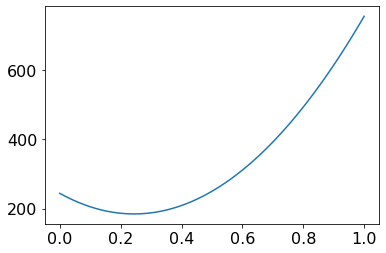

In [14]:
mu = np.linspace(0, 1, 101)
l = [loss(m, data) for m in mu]
plt.plot(mu, l);

In [15]:
minimize(loss, np.random.normal(size = 1),
         args = (data),
         method = "L-BFGS-B", 
         bounds = ((0.001, 0.999),))

      fun: 184.464
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.244])

In [16]:
np.mean(df["is_asshole"])

0.244

In [17]:
dfb = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/bike.csv")

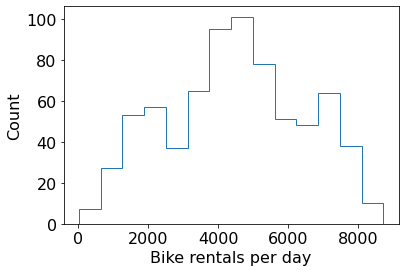

In [18]:
plt.hist(dfb["cnt"], bins = "fd", histtype = "step");
plt.xlabel("Bike rentals per day");
plt.ylabel("Count");

In [19]:
N = dfb["cnt"].size
data = {
    "y": dfb["cnt"]
}
out = minimize(loss, 
               np.random.normal(size = 1),
               args = (data),
               method = "L-BFGS-B",
               bounds = ((-np.inf, np.inf),))
m = out["x"]
m

array([4504.36857236])

In [20]:
np.mean(dfb["cnt"])

4504.3488372093025

$$cost(\sigma | x, \mu) = N * \log{\sigma} + \frac{1}{2\sigma^2} * \sum_{n=1}^N (y_n - \mu)^2$$

In [26]:
data = {
    "N": N,
    "y": dfb["cnt"],
    "m": m[0]
}
def cost(theta, data):
    return data["N"] * np.log(theta) + 0.5 * np.sum((data["y"] - data["m"]) ** 2) / theta ** 2

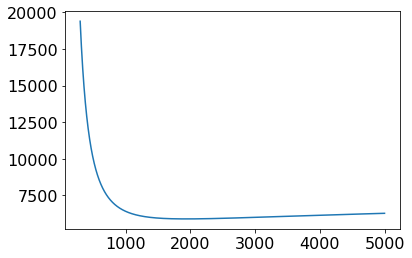

In [27]:
sigma = np.arange(300, 5000, 1)
c = [cost(s, data) for s in sigma]
plt.plot(sigma, c)

In [28]:
sigma[np.where(c == np.min(c))]

array([1936])

In [29]:
np.std(dfb["cnt"])

1935.8859561152221

In [30]:
minimize(cost, np.random.exponential(size=1), 
        args = (data), 
        bounds = ((0, np.inf),),
        method = "L-BFGS-B") # try Powell

      fun: 5897.942182567039
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 86
      nit: 41
     njev: 43
   status: 0
  success: True
        x: array([1935.88758972])